In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import common
import time
import scipy.odr as odr

In [211]:
data = common.load()
data = common.validate_data(data)

In [212]:
t_min = None
t_max = None

for k in data.keys():
    data_min = np.min(data[k].Time)
    data_max = np.max(data[k].Time)
    if t_min is None:
        t_min = data_min
    if t_max is None:
        t_max = data_max
    if data_min > t_min:
        t_min = data_min
    if data_max < t_max:
        t_max = data_max

print("[%s --- %s]" % (str(t_min), str(t_max)))
stamps = pd.date_range(t_min, t_max, freq="15min")

[2013-12-23 16:45:30 --- 2015-11-30 21:56:00]


In [213]:
t = []
cf_xl = []
cf_tsi = []
cf_rad = []
cf_terra = []
cf_aqua = []

def ds_filter(data, t1, t2):
    filtered_data = {}
    for d in data.keys():
        dataset = data[d]
        inds = (dataset.Time >= t1) & (dataset.Time < t2)
        filtered_data[d] = dataset[inds]
    return filtered_data

for i in range(len(stamps) - 1):
    t1 = stamps[i]
    t2 = stamps[i + 1]
    iter_data = ds_filter(data, t1, t2)
    
    t.append(t1)
    cf_xl.append(np.average(iter_data["rad"].XL_CloudFraction))
    cf_rad.append(np.average(iter_data["rad"].Shortwave_CloudFraction))
    cf_tsi.append(np.average(iter_data["tsi"].CloudFraction))
    cf_terra.append(np.average(iter_data["terra"].CloudFraction))
    cf_aqua.append(np.average(iter_data["aqua"].CloudFraction))
    if i % 1000 == 0:
        print(len(stamps) - i)
        
result = {"Time": t, "XL_CloudFraction": cf_xl, "RFA_CloudFraction": cf_rad,
          "Terra_CloudFraction": cf_terra, "Aqua_CloudFraction": cf_aqua, "TSI_CloudFraction": cf_tsi}

67893


/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


66893
65893
64893
63893
62893
61893
60893
59893
58893
57893
56893
55893
54893
53893
52893
51893
50893
49893
48893
47893
46893
45893
44893
43893
42893
41893
40893
39893
38893
37893
36893
35893
34893
33893
32893
31893
30893
29893
28893
27893
26893
25893
24893
23893
22893
21893
20893
19893
18893
17893
16893
15893
14893
13893
12893
11893
10893
9893
8893
7893
6893
5893
4893
3893
2893
1893
893


In [268]:
raw_result = pd.DataFrame(result)

In [269]:
raw_result

,Aqua_CloudFraction,RFA_CloudFraction,TSI_CloudFraction,Terra_CloudFraction,Time,XL_CloudFraction
0,NaN,0.988667,1.000000,0.633733,2013-12-23 16:45:30,0.947763
1,NaN,1.000000,1.000000,NaN,2013-12-23 17:00:30,0.996508
2,NaN,1.000000,1.000000,NaN,2013-12-23 17:15:30,0.995656
3,NaN,0.998000,NaN,NaN,2013-12-23 17:30:30,0.957448
4,NaN,0.996000,NaN,NaN,2013-12-23 17:45:30,inf
5,NaN,1.000000,NaN,NaN,2013-12-23 18:00:30,0.996422
6,NaN,1.000000,NaN,NaN,2013-12-23 18:15:30,0.992587
7,NaN,0.977333,NaN,NaN,2013-12-23 18:30:30,0.947604
8,NaN,0.997333,NaN,NaN,2013-12-23 18:45:30,0.868539
9,NaN,NaN,NaN,NaN,2013-12-23 19:00:30,inf


In [271]:
raw_result = pd.read_csv("refinado.csv")

In [272]:
raw = raw_result
raw = raw[np.isfinite(raw.XL_CloudFraction)]
raw = raw[np.isfinite(raw.RFA_CloudFraction)]
raw = raw[raw.XL_CloudFraction <= 1.0]
raw = raw[raw.RFA_CloudFraction <= 1.0]

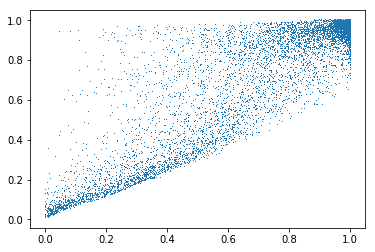

In [273]:
plt.plot(raw.RFA_CloudFraction, raw.XL_CloudFraction, ',')
plt.show()

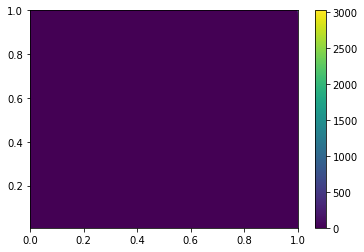

In [274]:
plt.hist2d(x=raw.RFA_CloudFraction, y=raw.XL_CloudFraction, bins=500)
plt.colorbar()
plt.show()

In [275]:
def hehe_plot(data, X, Y, c):
    inds = np.isfinite(data[X]) & np.isfinite(data[Y])
    inds = inds & (data[X] <= c) & (data[Y] <= c)
    ndata = data[inds]
    print(len(ndata))
    plt.plot(ndata[X], ndata[Y], ',')
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

In [294]:
def hehe_hist(data, X, Y, c):
    inds = np.isfinite(data[X]) & np.isfinite(data[Y])
    inds = inds & (data[X] <= c) & (data[Y] <= c)    
    ndata = data[inds]
    print(len(ndata))
    plt.hist2d(x=ndata[X], y=ndata[Y], bins=20)
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.colorbar()
    plt.show()

In [316]:
def hehe_corr(data, X, Y, c):
    inds = np.isfinite(data[X]) & np.isfinite(data[Y])
    inds = inds & (data[X] <= c) & (data[Y] <= c)    
    ndata = data[inds]
    #print(len(ndata))
    return ndata.corr()[X][Y]

4503


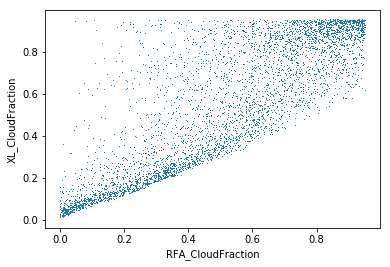

In [334]:
hehe_plot(raw, "RFA_CloudFraction", "XL_CloudFraction", 0.95)

In [279]:
raw_result[np.isfinite(raw_result.Terra_CloudFraction)]

,Aqua_CloudFraction,RFA_CloudFraction,TSI_CloudFraction,Terra_CloudFraction,Time,XL_CloudFraction
0,NaN,0.988667,1.000000,0.633733,2013-12-23 16:45:30,0.947763
49,NaN,NaN,NaN,1.000000,2013-12-24 05:00:30,0.000000
92,NaN,0.946000,NaN,1.000000,2013-12-24 15:45:30,0.961726
141,NaN,NaN,NaN,1.000000,2013-12-25 04:00:30,0.000000
191,NaN,0.916667,NaN,0.435595,2013-12-25 16:30:30,0.998437
240,NaN,NaN,NaN,1.000000,2013-12-26 04:45:30,NaN
333,NaN,NaN,NaN,1.000000,2013-12-27 04:00:30,NaN
382,NaN,0.771333,NaN,0.966885,2013-12-27 16:15:30,NaN
431,NaN,NaN,NaN,1.000000,2013-12-28 04:30:30,0.000000
481,NaN,1.000000,NaN,0.998806,2013-12-28 17:00:30,NaN


In [280]:
raw

,Aqua_CloudFraction,RFA_CloudFraction,TSI_CloudFraction,Terra_CloudFraction,Time,XL_CloudFraction
0,NaN,0.988667,1.000000,0.633733,2013-12-23 16:45:30,0.947763
1,NaN,1.000000,1.000000,NaN,2013-12-23 17:00:30,0.996508
2,NaN,1.000000,1.000000,NaN,2013-12-23 17:15:30,0.995656
3,NaN,0.998000,NaN,NaN,2013-12-23 17:30:30,0.957448
5,NaN,1.000000,NaN,NaN,2013-12-23 18:00:30,0.996422
6,NaN,1.000000,NaN,NaN,2013-12-23 18:15:30,0.992587
7,NaN,0.977333,NaN,NaN,2013-12-23 18:30:30,0.947604
8,NaN,0.997333,NaN,NaN,2013-12-23 18:45:30,0.868539
10,NaN,0.936000,NaN,NaN,2013-12-23 19:15:30,0.942267
73,NaN,1.000000,NaN,NaN,2013-12-24 11:00:30,0.983214


In [281]:
plt.figure()

In [230]:
x = np.random.rand(int(1e4))
y = x ** 2
z = np.sqrt(x)

In [231]:
d = {"x": x, "y": y, "z":z}
aaa = pd.DataFrame(d)

In [192]:
aaa.to_csv("a.csv", index=False)

In [ ]:
"/home/"